<a href="https://colab.research.google.com/github/M-PRERNA/MACHINE-LEARNING/blob/main/firstmodeltraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# converting celcius to fahrenheit f= C x 1.8 + 32

# Importing dependencies

In [ ]:
import tensorflow as tf
import numpy as np
import logging

In [ ]:
# telling logger to log only errr files
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# setting up the training data
supervised machine learning  is about figuring out an algorithm given the set of inputs and outputs.here in this problem we are creating a model that can give temperatuer in fahrenheit when it is given a temperature in celcius, thus we create two lists celcius and fahrenheit that we can use to train our model. 

In [ ]:
celcius_q = np.array([-40,-10,0,8,15,22,10],dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100],dtype=float)

for i,c in enumerate (celcius_q):
  print('{} X 1.8 + 32 = {}'.format(c,fahrenheit_a[i]))

-40.0 X 1.8 + 32 = -40.0
-10.0 X 1.8 + 32 = 14.0
0.0 X 1.8 + 32 = 32.0
8.0 X 1.8 + 32 = 46.0
15.0 X 1.8 + 32 = 59.0
22.0 X 1.8 + 32 = 72.0
10.0 X 1.8 + 32 = 100.0


* Feature - The input(s) to our model , in this case a snge vaue- the degrees in celcius
* labels - outputs our model predicts, in this case a single value - degree in fahrenheit
* example - a pair of inputs an d outputs used during training , in this acse a pair of values from celcius and fahrenheit at a specific index such as (22,72).




# create the model :
using  asimplest model which is the **dense network**.
since the problem is simplistic it requires only a *single layer,* with a *single neuron*.


## Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)

In [ ]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [ ]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from us(encapsulated). What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [ ]:
history = model.fit(celcius_q,fahrenheit_a,epochs = 500, verbose=False)

In [ ]:
print('model training done!')

model training done!


# displaying the training statistics using matplotlib:


In [ ]:
import matplotlib.pyplot as plt 

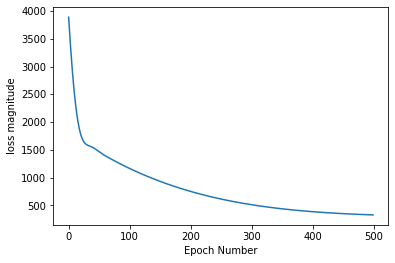

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('loss magnitude')
plt.plot(history.history['loss'])

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

# using our trained model to predict values

In [ ]:
print(model.predict([100.0]))

[[232.47765]]


In [ ]:
100 * 1.8 +32

212.0

In [ ]:
# so that's quite near about answer

review :
* created a model with a Dense layer 
* trained it with 3500 samples (7 pairs over 500 epochs)

 **100 celcius was not  apart of our training data**

In [ ]:
#  let's see how the internal variables of the dense look like

In [ ]:
print('These are the layer variables : {}'.format(l0.get_weights()))

These are the layer variables : [array([[1.9947064]], dtype=float32), array([33.007], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

In [ ]:
celsius_q = np.array([-40,-10,0,8,15,22,10],dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100],dtype=float)
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[237.29977]]
Model predicts that 100 degrees Celsius is: [[237.29977]] degrees Fahrenheit
These are the l0 variables: [array([[-0.19095723,  0.10571241,  0.27317703,  0.54305154]],
      dtype=float32), array([ 1.9573176, -2.1930697,  2.6770759,  3.1404119], dtype=float32)]
These are the l1 variables: [array([[ 1.2595801 , -0.09771316, -0.24647528, -0.3060404 ],
       [-0.492723  ,  0.5413432 ,  0.66108346,  0.46954396],
       [ 1.1833335 , -0.13073407, -0.81648725, -1.0068324 ],
       [ 1.4680644 , -1.0912699 , -0.889336  , -0.35849053]],
      dtype=float32), array([ 3.3041558, -2.3784685, -2.5543246, -3.1590185], dtype=float32)]
These are the l2 variables: [array([[ 1.2471495 ],
       [-0.32973474],
       [-0.6823924 ],
       [-1.0127633 ]], dtype=float32), array([3.1064737], dtype=float32)]


we can see that with additional layers l1 and l2 the internal variables are not closer to those in the formulas hence it adds on to the hiddenmathematical complexity upon a simple formula like conversion from celcius to fahrenheit